**Roll no : RBT21CB052**

**Name : Sejal Balkhande**

**Introduction**: Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.

The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. Further accurate classification of benign tumors can prevent patients undergoing unnecessary treatments. Thus, the correct diagnosis of BC and classification of patients into malignant or benign groups is the subject of much research. Because of its unique advantages in critical features detection from complex BC datasets, machine learning (ML) is widely recognized as the methodology of choice in BC pattern classification and forecast modelling.

Classification and data mining methods are an effective way to classify data. Especially in medical field, where those methods are widely used in diagnosis and analysis to make decisions.

**Importing Required Modules**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

**Loading the Dataset**

In [24]:
cancer = datasets.load_breast_cancer()

**Description of Dataset**

In [25]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [26]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Making Dataframe of the Dataset and summarizing the data**

In [27]:
cancer_df = pd.DataFrame(np.c_[cancer['data'],cancer['target']],
             columns = np.append(cancer['feature_names'], ['target']))

In [28]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [29]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


**Calculating Basic Statistics**

In [30]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [31]:
print(np.array(np.unique(cancer.target, return_counts=True)))

[[  0   1]
 [212 357]]


**Scaling the features**

So if the data in any conditions has data points far from each other, scaling is a technique to make them closer to each other or in simpler words, we can say that the scaling is used for making data points generalized so that the distance between them will be lower.

Whenever going for the modelling we should start with the raw data, then go with the scaling method and compare all the results. It is a good practice because in fewer lines of code we can implement the scaling part and if we are trying everything then there will be fewer chances of missing a perfect result.

In [32]:
X = cancer_df.drop(['target'], axis = 1)
y = cancer_df['target']

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

**Logistic Regression Model Without Dimensionality Reduction**

Logistic regression is a statistical method that is used for building machine learning models where the dependent variable is dichotomous: i.e. binary. Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables. The independent variables can be nominal, ordinal, or of interval type.

The name “logistic regression” is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.



Splitting the dataset into training and testing sets

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

In [35]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state = 51, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.9736842105263158

We have got about 97% accuracy with all the features.

Now let's see what Dimensionality Reduction can do for us.

**Applying PCA for Dimensionality reduction**

In [36]:
# Finding the number of components for PCA

from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)

# perform PCA on the data
PCA = pca.fit_transform(X)

Text(0, 0.5, 'Explained variance (%)')

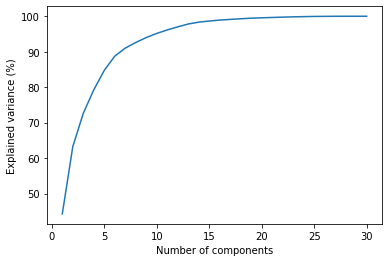

In [37]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

**2) Logistic Regression Model with PCA**

In [38]:
# According to scree plot setting the number of components

from sklearn.decomposition import PCA
pca = PCA(n_components = 6, whiten = True)
pca_X = pca.fit_transform(X)

In [39]:
# Making new training and test sets to apply to the new dataset with reduced features

pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_X, y, test_size = 0.2, random_state = 4)

In [40]:
# prediction using linear regression

from sklearn.linear_model import LinearRegression
pca_lr = LinearRegression()

# Train the model
pca_model = pca_lr.fit(pca_X_train, pca_y_train)

# Prediction
pca_y_pred =  pca_lr.predict(pca_X_test)

# Accuracy Score
pca_lr.score(pca_X_test, pca_y_test).round(4)

0.7068

After applying PCA, we got nearly 70% accuaracy.

**Impact of PCA**

Well, we got a very close accuracy after applying the Dimensionality Reduction. But after that, our feature number gets decreased. This is called dimensionality loss. But PCA choose the best feature for our model. We set the value 10 to the parameter n_components to let PCA choose 10 features among the total number of features. We can change the value as our own choice. But we have to be carefull about the dimensionality loss. Removing too many features sometimes can face an abrupt drop of accuracy of the model.

Sometimes we will notice that Dimensionality Reduction doesn't work very well. Even in this model, it's performance wasn't that satisfactory. What just happened here? Mainly Dimensionality Reduction removes the features which are strongly correlated with each other more than the target variable. But if we plot a correlation matrics of our dataset, we will see there are no such strong correlation between the features themselves. That's why PCA didn't perfom that good in this case.

Correlation

In [41]:
corr = cancer_df.corr()
corr.shape

(31, 31)

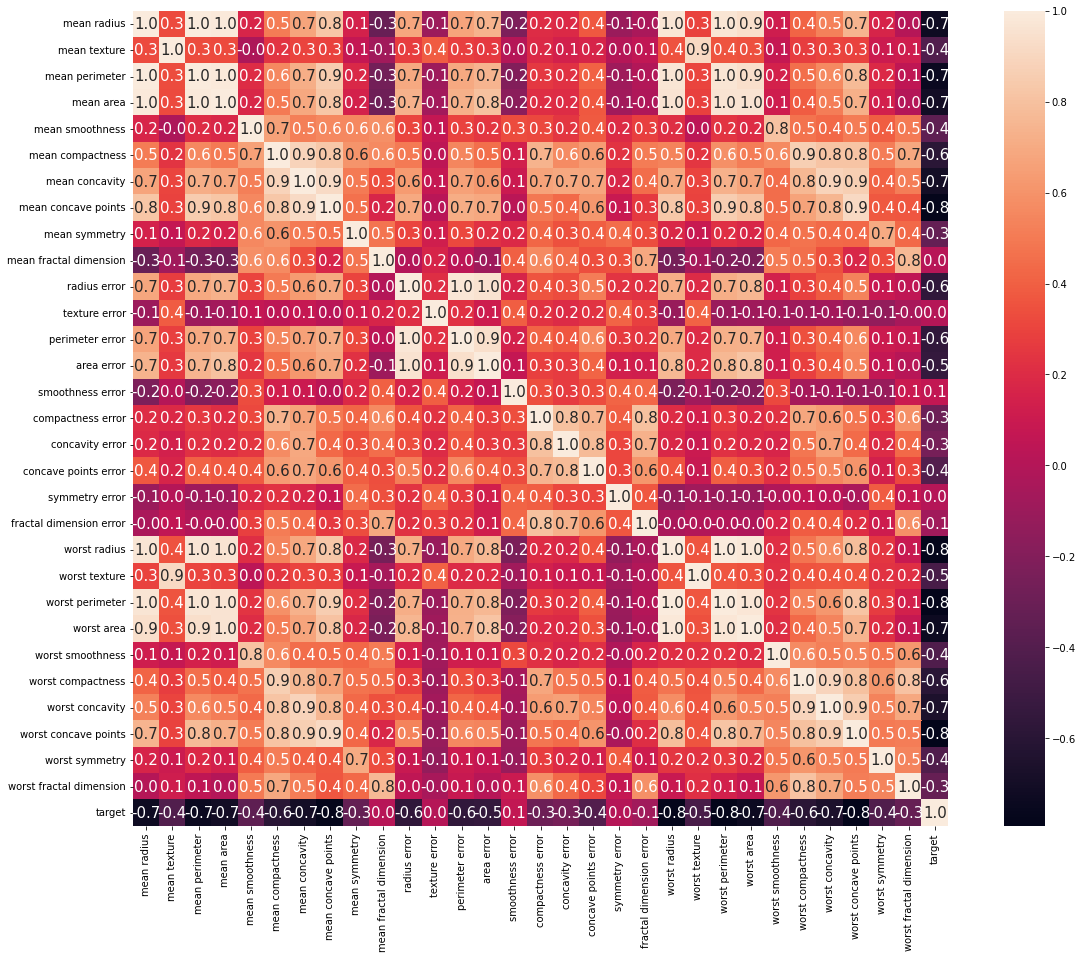

In [42]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})

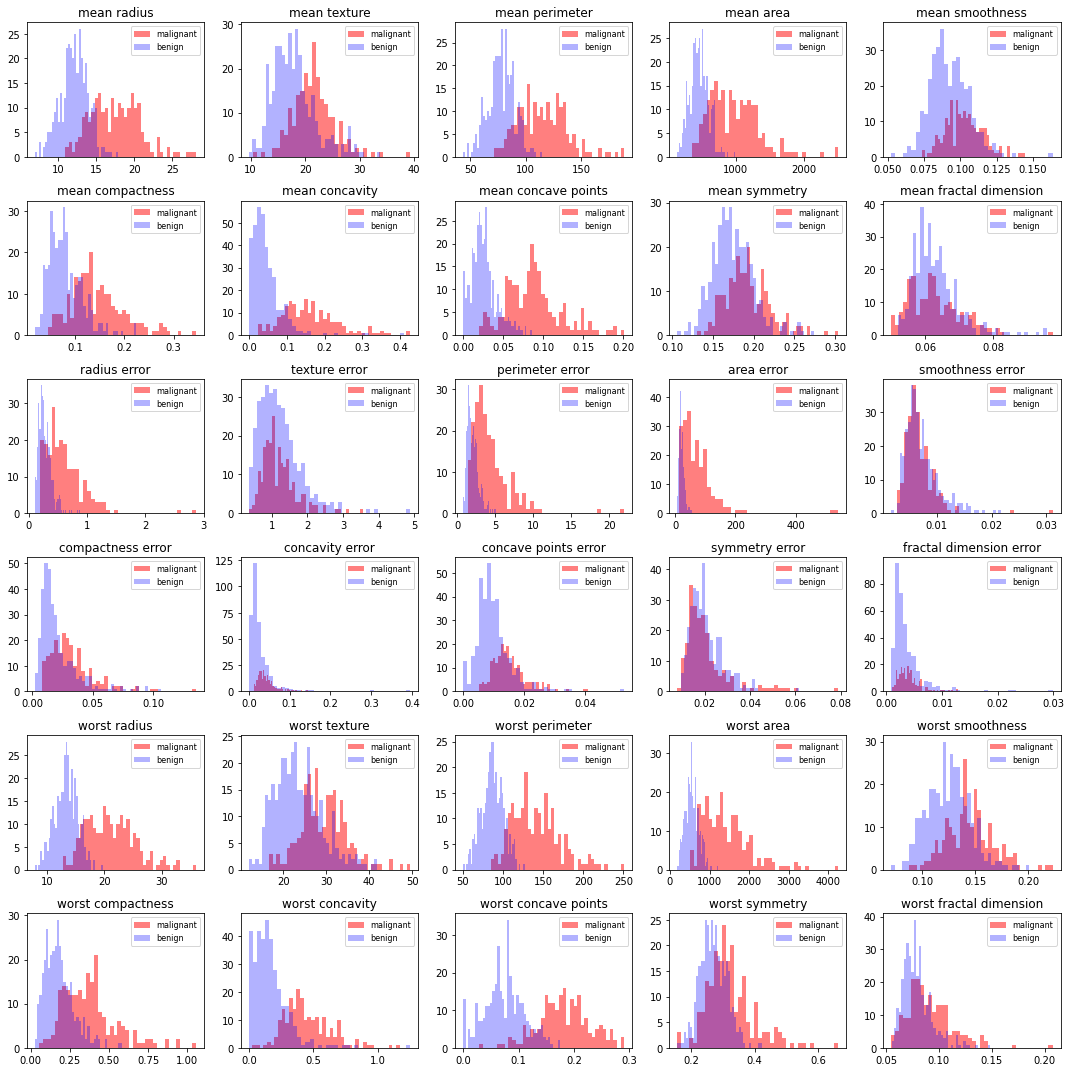

In [43]:
_, axes = plt.subplots(6,5, figsize=(15, 15))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]
ax = axes.ravel()                     # flatten the 2D array
for i in range(30):                   # for each of the 30 features
    bins = 40
    #---plot histogram for each feature---
    ax[i].hist(malignant[:,i], bins=bins, color='r', alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color='b', alpha=0.3)
    #---set the title---
    ax[i].set_title(cancer.feature_names[i], fontsize=12)    
    #---display the legend---
    ax[i].legend(['malignant','benign'], loc='best', fontsize=8)
    
plt.tight_layout()
plt.show()

**FACTOR ANALYSIS**

Factor Analytics is a special technique reducing the huge number of variables into a few numbers of factors is known as factoring of the data, and managing which data is to be present in sheet comes under factor analysis. It is completely a statistical approach that is also used to describe fluctuations among the observed and correlated variables in terms of a potentially lower number of unobserved variables called factors.

The factor analysis technique extracts the maximum common variance from all the variables and puts them into a common score. It is a theory that is used in training the machine learning model and so it is quite related to data mining. The belief behind factor analytic techniques is that the information gained about the interdependencies between observed variables can be used later to reduce the set of variables in a dataset.

In [44]:
pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 588 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 201 kB 8.9 MB/s 
     |████████████████████████████████| 8.8 MB 38.1 MB/s 
     |████████████████████████████████| 98 kB 8.1 MB/s 
     |████████████████████████████████| 468 kB 46.6 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=928d6aa72b2f96bc34b3697e124cd239d4182a6b14e58d89afd417c2413b19a5
  Stored in directory: /root/.cache/pip/wheels/f5/8f/2e/a689c21bc4bf04f84ceebf4b1f5846cacc04bfe179e7ad5ab0
Successfully built factor-analyzer


BARTLETT’S TEST OF SPHERICITY

Bartlett’s test checks whether the correlation is present in the given data. It tests the null hypothesis (H0) that correlation matrix is an Identical matrix. Identical matrix consists all the diagonal elements as 1. So, the null hypothesis assumes that no correlation is present among the variables. We want to reject this null hypothesis because factor analysis aims at explaining the common variance i.e. the variation due to correlation among the variables. If the p test statistic value is less than 0.05, we can decide that the correlation is not an Identical matrix i.e. correlation is present among the variables with 95% confidence level.

In [45]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2,p = calculate_bartlett_sphericity(cancer_df)
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  40167.50616156457
p value :  0.0


Just simply pass the dataset through the calculate_bartltett_sphericty function,it will test the null hypothesis and will return the chi-squared value and the p test statistic. Since, the p test statistic is less than 0.05, we can conclude that correlation is present among the variables which is a green signal to apply factor analysis.

KAISER-MEYER-OLKIN (KMO) TEST

KMO Test measures the proportion of variance that might be common variance among the variables. Larger proportions are expected as it represents more correlation is present among the variables there by giving way for application of dimensionality reduction techniques such as Factor Analysis. KMO score is always between 0 to 1 and values more than 0.6 are much appreciated. We can also say it as a measure of how suited our data is for factor analysis.

In [46]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars,kmo_model = calculate_kmo(cancer_df)
print(kmo_model)

0.8436079362152131


/usr/local/lib/python3.8/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Just pass the dataframe which contains information about the dataset to the calculate_kmo function. The function will return the proportion of variance for each variables which is stored in the variable ‘kmo_vars’ and the proportion of variance for the whole of our data is stored in ‘kmo_model’. We can see that our data has an overall proportion of variance of 0.84. It shows that our data has more correlation and dimensionality reduction techniques such as the factor analysis can be applied.

DETERMINING THE NUMBER OF FACTORS

The number of factors in our dataset is equal to the number of variables in our dataset. All the factors are not gonna provide a significant amount of useful information about the common variance among the variables. So we have to decide the number of factors. The number of factors can be decided on the basis of the amount of common variance the factors explain. In general, we will plot the factors and their eigen values. Eigen values are nothing but the amount of variance the factor explains. We will select the number of factors whose eigen values are greater than 1.

In [47]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=cancer_df.shape[1])
fa.fit(cancer_df)
ev,_ = fa.get_eigenvalues()

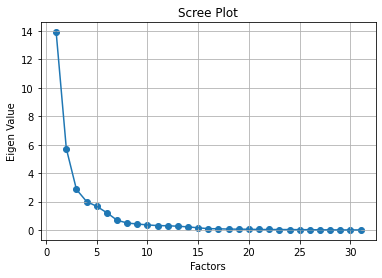

In [48]:
plt.scatter(range(1,cancer_df.shape[1]+1),ev)
plt.plot(range(1,cancer_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

The eigen values function will return the original eigen values and the common factor eigen values. Now, we are going to consider only the original eigen values. From the graph we can see that the eigen values drops below 1 from the 4th factor. So, the optimal number of factors are 6.

In [49]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(cancer_df)
print(pd.DataFrame(fa.loadings_,index=cancer_df.columns))

                                0         1         2         3         4  \
mean radius              0.959723  0.051867 -0.024997 -0.153219  0.092548   
mean texture             0.263081  0.075989 -0.029946  0.100835  0.857950   
mean perimeter           0.959585  0.093295  0.005430 -0.143380  0.094051   
mean area                0.972601  0.050054 -0.018490 -0.076174  0.077701   
mean smoothness          0.207979  0.186834  0.804017  0.212713 -0.102586   
mean compactness         0.480883  0.604422  0.478047 -0.015417  0.073401   
mean concavity           0.665781  0.587400  0.299544 -0.005811  0.106776   
mean concave points      0.818234  0.338576  0.338140 -0.006761  0.071322   
mean symmetry            0.169408  0.283986  0.359004  0.198068 -0.018876   
mean fractal dimension  -0.292062  0.586965  0.553903  0.205043 -0.064779   
radius error             0.811947  0.159065  0.038516  0.443668  0.005480   
texture error           -0.068324  0.150603 -0.079018  0.617717  0.410980   

Loadings indicate how much a factor explains a variable. The loading score will range from -1 to 1.Values close to -1 or 1 indicate that the factor have influence on these variables. Values close to 0 indicates that the factor has lower influencer on the variable.

VARIANCE

The amount of variance explained by each factors can be found out using the ‘get_factor_variance’ function.

In [50]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                          0         1         2         3         4         5
Variance          10.812912  5.465523  3.475631  2.390928  2.222924  1.994308
Proportional Var   0.348804  0.176307  0.112117  0.077127  0.071707  0.064333
Cumulative Var     0.348804  0.525111  0.637228  0.714355  0.786062  0.850394


The first row represents the variance explained by each factors. Proportional variance is the variance explained by a factor out of the total variance. Cumulative variance is nothing but the cumulative sum of proportional variances of each factor. In our case, the 4 factors together are able to explain 85% of the total variance.